### 座標情報をpostで受け取る
### 接触等を見つける
### requestが来たら全部のエージェントの位置情報を返す
### シェーダー処理とかはローカル（ビューアー）で行ってもらう。（見える位置とかに寄る？）
### 2つのオブジェクト同士が内部で重なりがあるなら、それらの境界面同士も必ず重なりがある。（包含関係にない場合）

In [ ]:
import socket
import time
import numpy as np
import json
import cv2
from scipy.sparse import lil_matrix, csr_matrix
from collections import OrderedDict

db = {} # Don't use OrderedDict

PORT = 4423
with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
    s.bind(('127.0.0.1', PORT))
    s.listen(1)
    while True:
        conn, addr = s.accept()
        with conn:
            while True:
                try:
                    rec = conn.recv(65536)
                except:
                    continue
                if not rec:
                    break
                rec = json.loads(rec)
                
                
                if rec['queue'] == 'post':
                    data = rec['data']
                    if not data['name'] in db.keys():
                        res = json.dumps({
                            'message': 'hello '+data['name']+' san.'}).encode()
                    conn.sendall(res)
                    db[data['name']] = data['vertices']
                elif rec['queue'] == 'get_all':
                    res = json.dumps({'data': db}).encode()
                    conn.sendall(res)
#                 elif rec['queue'] == 'get_around':
#                     colors = 
                    
#                     key = rec['key']
#                     res = json.dumps({'data': db}).encode()
#                     conn.sendall(res)

In [7]:
db.keys()

dict_keys(['mnist0', 'mnist1', 'mnist2', 'mnist3'])

In [143]:
contours = np.zeros([480, 640])
for k, v in enumerate(db.values()):
    for i in range(len(v)-1):
        cv2.line(contours, (v[i][1],v[i][0]), (v[i+1][1],v[i+1][0]), (k+1), 1)
_contours = lil_matrix(contours).tocsr()

In [144]:
v = db['mnist0']
contour = np.zeros([480, 640])
for i in range(len(v)-1):
    cv2.line(contour, (v[i][1],v[i][0]), (v[i+1][1],v[i+1][0]), (1), 1)

_contour = cv2.dilate(contour,np.ones((2,2)))
contour = _contour - contour
_contour = lil_matrix(contour).tocsr()

In [145]:
overlaps = _contours.multiply(_contour)
overlaps = overlaps.toarray()

In [146]:
np.unique(overlaps)

array([0., 3.])

TypeError: 'dict_keys' object does not support indexing

### 輪郭の輪郭
- 内側か外側かはわからない
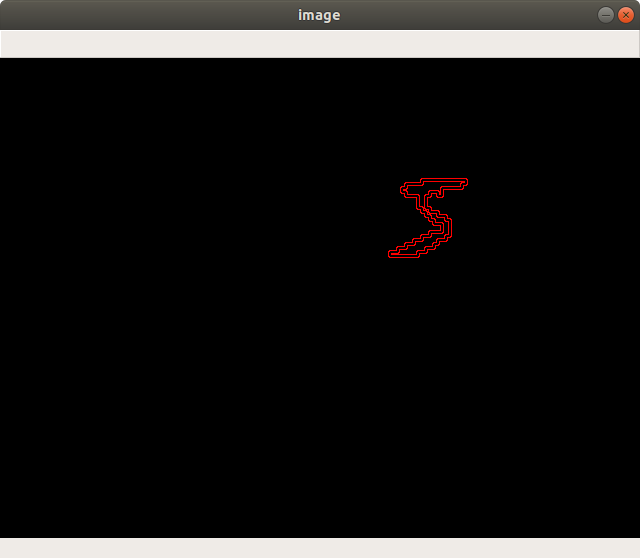

In [125]:
cv2.destroyAllWindows()

In [37]:
db.keys(), db

(dict_keys([]), {})

In [ ]:
colors = {key: (i%255**2, i//255, ) for i,key in enumerate(db.keys())}

- ワールドのレンダリングは行う。
- 全部を一つのfigureにまとめてプロットしておく。
- camera座標を受け取ると、responseを返す・